In [14]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import re

In [15]:
import os
import json
import pandas as pd
from tqdm import tqdm

# Directories for score detection results
RESULTS_BASE_DIR = "/Users/ypi/SimulatingManipulativeAgents/"
SCORE_THRESHOLDS = [3, 4, 5, 6, 7, 8]

def load_results(dataset_name, directory):
    """
    Load the detection results from a given directory for the specified dataset.
    
    Args:
        dataset_name (str): The name of the dataset.
        directory (str): The directory containing the results.
        
    Returns:
        dict: The loaded results.
    """
    filepath = os.path.join(directory, dataset_name)
    with open(filepath, "r") as f:
        return json.load(f)

def extract_metrics(results):
    """
    Extract the metrics (precision, recall, F1, accuracy) from the results.
    
    Args:
        results (dict): The results object containing the metrics.
        
    Returns:
        dict: A dictionary of extracted metrics.
    """
    return {
        "Precision": results["metrics"]["precision"],
        "Recall": results["metrics"]["recall"],
        "F1": results["metrics"]["f1"],
        "Accuracy": results["metrics"]["accuracy"]
    }

# Function to get metrics for a specific score threshold
def get_metrics_for_score(score_threshold):
    """
    Get metrics for a specific score threshold.
    
    Args:
        score_threshold (int): The score threshold to analyze.
    
    Returns:
        list: List of metrics dictionaries for all datasets at this threshold.
    """
    results_dir = os.path.join(RESULTS_BASE_DIR, f"results_score_{score_threshold}")
    dataset_names = os.listdir(results_dir)
    
    metrics = []
    for dataset_name in tqdm(dataset_names, desc=f"Processing score {score_threshold} datasets"):
        try:
            results = load_results(dataset_name, results_dir)
            metrics_dict = extract_metrics(results)
            metrics.append(metrics_dict)
        except Exception as e:
            print(f"Error processing {dataset_name}: {e}")
    
    return metrics

# Extract metrics for all score thresholds
all_score_metrics = {}
for score in SCORE_THRESHOLDS:
    all_score_metrics[score] = get_metrics_for_score(score)

# Compute average metrics for each score threshold
avg_metrics = {}
for score, metrics_list in all_score_metrics.items():
    avg_metrics[score] = {
        "Precision": sum(m["Precision"] for m in metrics_list) / len(metrics_list),
        "Recall": sum(m["Recall"] for m in metrics_list) / len(metrics_list),
        "F1": sum(m["F1"] for m in metrics_list) / len(metrics_list),
        "Accuracy": sum(m["Accuracy"] for m in metrics_list) / len(metrics_list)
    }

# Convert to DataFrame for easy viewing
metrics_df = pd.DataFrame.from_dict(avg_metrics, orient='index')
print("Average Metrics for Each Score Threshold:")
print(metrics_df)

Processing score 8 datasets: 100%|██████████| 9/9 [00:00<00:00, 499.08it/s]

Average Metrics for Each Score Threshold:
   Precision    Recall        F1  Accuracy
3   0.818334  0.933155  0.864181  0.942906
4   0.966860  0.912302  0.930344  0.975500
5   0.975383  0.876069  0.907978  0.969667
6   0.975233  0.859147  0.896195  0.966222
7   0.975742  0.792550  0.846566  0.952667
8   0.965020  0.478288  0.584263  0.889667


([<matplotlib.axis.XTick at 0x146a61dc0>,
 [Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

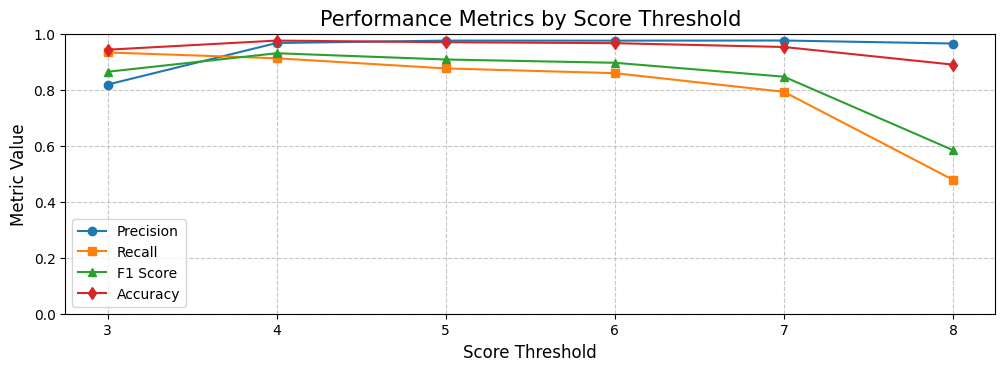

In [16]:
import matplotlib.pyplot as plt

# Ensure the index is of integer type
metrics_df.index = metrics_df.index.astype(int)

plt.figure(figsize=(12, 8))

# Plot performance metrics
plt.subplot(2, 1, 1)
plt.plot(metrics_df.index, metrics_df['Precision'], marker='o', label='Precision')
plt.plot(metrics_df.index, metrics_df['Recall'], marker='s', label='Recall')
plt.plot(metrics_df.index, metrics_df['F1'], marker='^', label='F1 Score')
plt.plot(metrics_df.index, metrics_df['Accuracy'], marker='d', label='Accuracy')

plt.title('Performance Metrics by Score Threshold', fontsize=15)
plt.xlabel('Score Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)

# Set discrete integer ticks for the x-axis
plt.xticks(ticks=metrics_df.index)
